# Health study report


För VG ska du även göra:

- Beräkna konfidensintervallet med två olika metoder (t.ex. normalapproximation och bootstrap) och jämför resultaten.
- Gör en simulering för att undersöka hur säkert ditt hypotes­test är (t.ex. hur ofta testet hittar en skillnad när den finns → power).
- Motivera dina metodval i markdown och hänvisa till dokumentation eller annan källa.

In [114]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

REQUIRED = [
    "id", "age", "sex", "height", "weight", "systolic_bp", "cholesterol", "smoker", "disease"
]

def load_data(path: str) -> pd.DataFrame:
    """
    Läser CSV och kontrollerar att alla kolumner som listas i "REQUIRED" finns med.
    """
    df = pd.read_csv("data/health_study_dataset.csv")
    missing = [c for c in REQUIRED if c not in df.columns]
    if missing:
        raise ValueError(f"Saknade kolumner: {missing}")
    return df

def coerce_numeric(df: pd.DataFrame) -> pd.DataFrame:
    """
    Säkerställer att numeriska kolumner faktiskt är numeriska.
    """
    out = df.copy()
    for c in ["age", "height", "systolic_bp", "cholesterol", "disease"]:
        out [c] = pd.to_numeric(out[c], errors="coerce")
    return out


In [115]:
df = load_data("data/health_study_dataset.csv")
df = coerce_numeric(df)

print(df.isna().sum()) # kontrollera så det inte finns några NaN-värde

id             0
age            0
sex            0
height         0
weight         0
systolic_bp    0
cholesterol    0
smoker         0
disease        0
dtype: int64


In [116]:
columns = ["age", "weight", "height", "systolic_bp", "cholesterol"]

summary = pd.DataFrame ({
    "mean": df[columns].mean(),
    "median": df[columns].median(),
    "min": df[columns].min(),
    "max": df[columns].max()
})

print("Medel, median, min och max för utvalda kategorier:")
display(summary)


Medel, median, min och max för utvalda kategorier:


,mean,median,min,max
age,49.426250,50.00,18.0,90.00
weight,73.413000,73.20,33.7,114.40
height,171.849250,171.35,144.4,200.40
systolic_bp,149.178625,149.40,106.8,185.90
cholesterol,4.929150,4.97,2.5,7.88


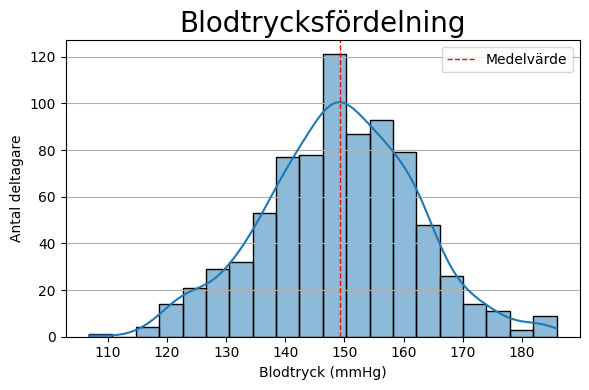

In [117]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 4))
sns.histplot(df["systolic_bp"], bins=20, edgecolor="black", ax=ax, kde=True)
ax.axvline((df["systolic_bp"]).mean(), color="red", linestyle="--", linewidth="1", label="Medelvärde")
ax.set_title("Blodtrycksfördelning", fontsize=20)
ax.set_xlabel("Blodtryck (mmHg)")
ax.set_ylabel("Antal deltagare")
ax.legend()
plt.grid(True, axis="y")
plt.tight_layout()
plt.show()

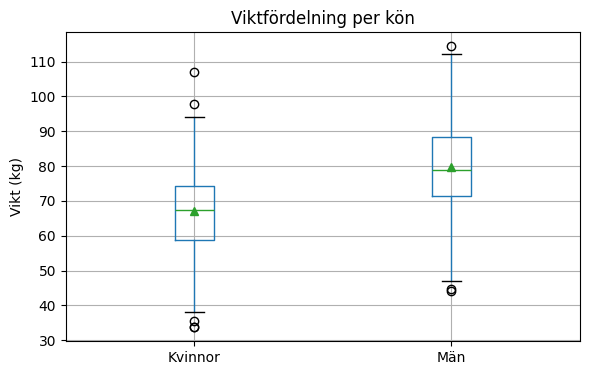

In [118]:
fig, ax = plt.subplots(figsize=(6, 4))
df.boxplot(column="weight", by="sex", ax=ax, showmeans=True)
ax.set_title("Viktfördelning per kön")
ax.set_xlabel("")
ax.set_ylabel("Vikt (kg)")
ax.set_xticklabels(["Kvinnor", "Män"])
plt.suptitle("") 
plt.tight_layout()
plt.show()


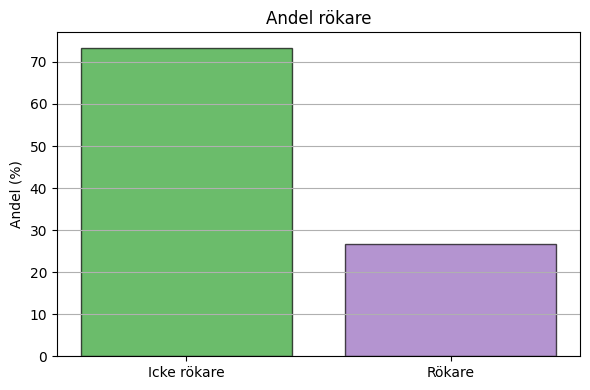

In [119]:
smoker_count = df["smoker"].value_counts(normalize=True)*100

fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(smoker_count.index.astype(str), smoker_count.values, alpha=0.7, edgecolor="black", color=["tab:green", "tab:purple"])
ax.set_title("Andel rökare")
ax.set_xlabel("")
ax.set_ylabel("Andel (%)")
ax.set_xticks([0, 1])
ax.set_xticklabels(["Icke rökare", "Rökare"])
ax.grid(True, axis="y")
plt.tight_layout()
plt.show;

In [120]:
sick = df[df["disease"] == 1]
sick = sick.value_counts().sum()

total = len(df)

sick_percent = sick / total * 100

In [121]:
np.random.seed(42)

In [122]:
n = 1000
w_disease = sick / total

sim = np.random.choice([0, 1], size=n, p=[1 - w_disease, w_disease])
sim_mean = sim.mean() * 100

print(f"Antalet med sjukdomen är: {sick} st dvs {sick_percent:.2f}% av deltagarna")
print(f"Med simulation blir andelen sjuka {sim_mean:.2f}%")

Antalet med sjukdomen är: 47 st dvs 5.88% av deltagarna
Med simulation blir andelen sjuka 5.60%


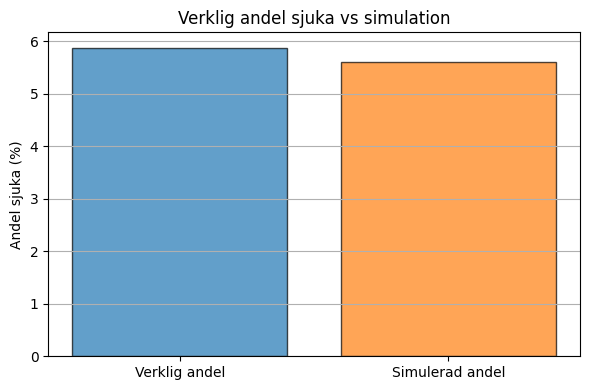

In [123]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(["Verklig andel", "Simulerad andel"], [sick_percent, sim_mean], alpha=0.7, edgecolor="black", color=["tab:blue", "tab:orange"])
ax.set_title("Verklig andel sjuka vs simulation")
ax.set_xlabel("")
ax.set_ylabel("Andel sjuka (%)")
ax.grid(True, axis="y")
plt.tight_layout()
plt.show;

### Grafen ovan visar en jämförelse över den simulerade andelen och den verkliga andelen sjuka.
Den simulerade andelen är baserad på 1000 slumpmässigt valda personer med återläggning från datasetet.

In [131]:
x = df["systolic_bp"].dropna().to_numpy()
rng = np.random.default_rng(0)
n = len(x)
B = 5000

b_means = np.array([x[rng.integers(0, n, size=n)].mean() for _ in range(B)])

boot_mean = np.mean(b_means)
ci_low, ci_high = np.percentile(b_means, [2.5, 97.5])

print("Konfidensintervall för blodtryck (bootstrap):")
print(f"Medel: {boot_mean:.2f}, 95% CI: {ci_low:.2f}, {ci_high:.2f}")


Konfidensintervall för blodtryck (bootstrap):
Medel: 149.18, 95% CI: 148.28, 150.06


In [125]:
# 95%-CI för medel med normal-approximation:
from math import sqrt

x = df["systolic_bp"].dropna().to_numpy()
mean_x = x.mean()
sd = x.std(ddof=1)             
n = x.size
se = sd / np.sqrt(n)

z = 1.96
lo_norm = (mean_x - z*se) 
hi_norm = (mean_x + z*se)

print("Konfidensintervall för blodtryck (normal-approximation):")
print(f"Medel: {mean_x:.2f}, 95% CI: {lo_norm:.2f}, {hi_norm:.2f}")

Konfidensintervall för blodtryck (normal-approximation):
Medel: 149.18, 95% CI: 148.29, 150.07


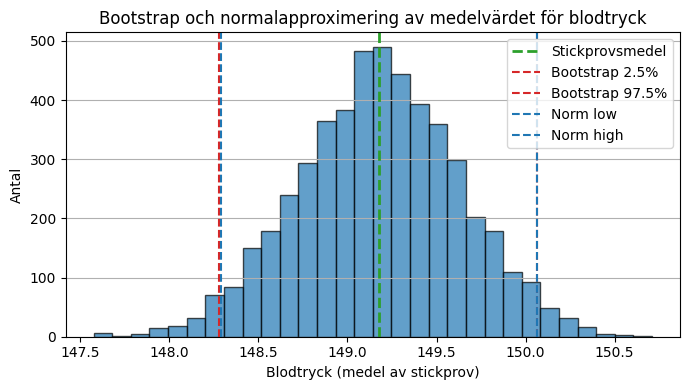

In [133]:
fig, ax = plt.subplots(figsize=(7,4))
ax.hist(b_means, bins=30, alpha=0.7, edgecolor="black")
ax.axvline(mean_x, color="tab:green", linestyle="--", label="Stickprovsmedel", linewidth=2)
ax.axvline(ci_low, color="tab:red", linestyle="--", label="Bootstrap 2.5%")
ax.axvline(ci_high, color="tab:red", linestyle="--", label="Bootstrap 97.5%")
ax.axvline(lo_norm, color="tab:blue", linestyle="--", label="Norm low")
ax.axvline(hi_norm, color="tab:blue", linestyle="--", label="Norm high")
ax.set_title("Bootstrap och normalapproximering av medelvärdet för blodtryck")
ax.set_xlabel("Blodtryck (medel av stickprov)")
ax.set_ylabel("Antal")
ax.grid(True, axis="y")
ax.legend()
plt.tight_layout()
plt.show()

### Grafen ovan visar jämförelsen när konfidensintervallet för blodtryck tagits ut med Bootstrap och Normalapproximation.

Då det visar väldigt liten skillnad i resultat oavsett vilken metod man använder bör vi i detta fall välja normalapproximation. 

In [ ]:
s_yes = (df["smoker"] == "Yes").sum()
s_no = total - s_yes

print(f"Antal rökare är {s_yes} st och icke-rökare {s_no} st deltagare.")

smoker_stats = df.groupby("smoker")["systolic_bp"].agg(["count", "mean", "median", "std", "min", "max"])
smoker_stats


Antal rökare är 213 st och icke-rökare 587 st deltagare.


,count,mean,median,std,min,max
smoker,,,,,,
No,587,149.052981,149.3,12.626038,116.3,185.9
Yes,213,149.524883,149.5,13.267800,106.8,184.2


In [ ]:
low, high = df["systolic_bp"].quantile([0.01, 0.99])
clipped = df[(df["systolic_bp"] >= low) & (df["systolic_bp"] <= high)]

compare_means = pd.DataFrame({
    "original_mean_Y": [df.loc[df.smoker == "Yes", "systolic_bp"].mean()],
    "original_mean_N": [df.loc[df.smoker == "No", "systolic_bp"].mean()],
    "clipped_mean_Y": [clipped.loc[clipped.smoker == "Yes", "systolic_bp"].mean()],
    "clipped_mean_N": [clipped.loc[clipped.smoker == "No", "systolic_bp"].mean()]
})

compare_means

,original_mean_Y,original_mean_N,clipped_mean_Y,clipped_mean_N
0,149.524883,149.052981,149.194634,149.145423


In [ ]:
s_yes = df.loc[df["smoker"] == "Yes", "systolic_bp"].dropna().to_numpy()
s_no = df.loc[df["smoker"] == "No", "systolic_bp"].dropna().to_numpy()

n_boot = 5000
obs_diff = s_yes.mean() - s_no.mean()

boot_diffs = np.empty(n_boot) 
for i in range(n_boot):
    s1 = np.random.choice(s_yes, size=len(s_yes), replace=True)
    s2 = np.random.choice(s_no, size=len(s_yes), replace=True)
    boot_diffs[i] = s1.mean() - s2.mean()

p_boot = np.mean(np.abs(boot_diffs) >= abs(obs_diff)) # beräknat bootstrap p-andel

ci_low, ci_high = np.percentile(boot_diffs, [2.5, 97.5])

print(f"Observerad skillnad mellan rökare och icke-rökare: {obs_diff:.2f} mmHg")
print(f"95% konfidensintervall: [{ci_low:.2f}, {ci_high:.2f}]")
print(f"Bootstrap p-värde: {p_boot:.4f}")

Observerad skillnad mellan rökare och icke-rökare: 0.47 mmHg
95% konfidensintervall: [-2.03, 2.86]
Bootstrap p-värde: 0.7250


## Slutsats
### Hypotes: ”Rökare har högre medel-blodtryck än icke-rökare.”

- Den observerade skillnaden mellan rökare och icke rökare, 0.47 mmHg, är väldigt liten.
- P-värdet är ungefär 0.72 vilket är högt och betyder att slumpen kan ha orsakat. Nollhypotesen kan ej förkastas i detta fall.
- Då 0 ligger inom konfidensintervallet finns det inget statistiskt stöd och man kan inte utesluta att den sanna skillnaden är 0.
- Man behöver mer data för att se om det finns någon effekt. 